In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

y2015 = pd.read_csv(
    '/Users/genta/Desktop/Thinkful/Unit 2 Supervised learning/LoanStats3dbackup.csv',
    skipinitialspace=True, header=1)

# Note the warning about dtypes.

c:\users\genta\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
y2015.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68009401,72868139.0,16000.0,16000.0,16000.0,60 months,14.85%,379.39,C,C5,...,0.0,2.0,78.9,0.0,0.0,2.0,298100.0,31329.0,281300.0,13400.0
1,68354783,73244544.0,9600.0,9600.0,9600.0,36 months,7.49%,298.58,A,A4,...,0.0,2.0,100.0,66.7,0.0,0.0,88635.0,55387.0,12500.0,75635.0
2,68466916,73356753.0,25000.0,25000.0,25000.0,36 months,7.49%,777.55,A,A4,...,0.0,0.0,100.0,20.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0
3,68466961,73356799.0,28000.0,28000.0,28000.0,36 months,6.49%,858.05,A,A2,...,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0
4,68495092,73384866.0,8650.0,8650.0,8650.0,36 months,19.89%,320.99,E,E3,...,0.0,12.0,100.0,50.0,1.0,0.0,38998.0,18926.0,2750.0,18248.0


In [4]:
# Convert ID and Interest Rate to numeric.
y2015['id'] = pd.to_numeric(y2015['id'], errors='coerce')
y2015['int_rate'] = pd.to_numeric(y2015['int_rate'].str.strip('%'), errors='coerce')

# Drop some columns
y2015.drop(['url', 'emp_title', 'zip_code', 'earliest_cr_line', 'revol_util',
            'sub_grade', 'addr_state', 'desc'], 1, inplace=True)

In [5]:
#deleting extra columns to test for drill
y2015.drop(['id', 'member_id', 'issue_d', 'pymnt_plan','funded_amnt','funded_amnt_inv','title','out_prncp_inv','total_pymnt_inv'], 1, inplace=True)

In [6]:
#deleting extra columns to test for drill
y2015.drop(['verification_status','grade','policy_code','annual_inc_joint','verification_status_joint','mths_since_recent_inq'], 1, inplace=True)

In [8]:
# Remove two summary rows at the end that don't actually contain data.
y2015 = y2015[:-2]
y2015.tail()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,loan_status,purpose,dti,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
421090,10000.0,36 months,11.99,332.10,8 years,RENT,31000.0,Current,debt_consolidation,28.69,...,0.0,1.0,100.0,100.0,0.0,0.0,32950.0,25274.0,9200.0,15850.0
421091,24000.0,36 months,11.99,797.03,10+ years,MORTGAGE,79000.0,Current,home_improvement,3.90,...,0.0,2.0,56.5,100.0,0.0,0.0,152650.0,8621.0,9000.0,0.0
421092,13000.0,60 months,15.99,316.07,5 years,RENT,35000.0,Charged Off,debt_consolidation,30.90,...,0.0,3.0,100.0,50.0,1.0,0.0,51239.0,34178.0,10600.0,33239.0
421093,12000.0,60 months,19.99,317.86,1 year,RENT,64400.0,Charged Off,debt_consolidation,27.19,...,1.0,2.0,95.0,66.7,0.0,0.0,96919.0,58418.0,9700.0,69919.0
421094,20000.0,36 months,11.99,664.20,10+ years,RENT,100000.0,Current,credit_card,10.83,...,0.0,1.0,100.0,50.0,0.0,1.0,43740.0,33307.0,41700.0,0.0


In [9]:
#following the same path with deleted fields
pd.get_dummies(y2015)

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,...,last_credit_pull_d_May-15,last_credit_pull_d_May-16,last_credit_pull_d_Nov-15,last_credit_pull_d_Nov-16,last_credit_pull_d_Oct-15,last_credit_pull_d_Oct-16,last_credit_pull_d_Sep-15,last_credit_pull_d_Sep-16,application_type_INDIVIDUAL,application_type_JOINT
0,16000.0,14.85,379.39,48000.0,33.18,0.0,0.0,33.0,2.0,11.0,...,0,0,0,0,0,0,0,0,1,0
1,9600.0,7.49,298.58,60000.0,22.44,0.0,0.0,NaN,NaN,7.0,...,0,0,0,0,0,0,0,0,1,0
2,25000.0,7.49,777.55,109000.0,26.02,0.0,1.0,NaN,NaN,9.0,...,0,0,0,0,0,0,0,0,1,0
3,28000.0,6.49,858.05,92000.0,21.60,0.0,0.0,42.0,NaN,16.0,...,0,0,0,0,0,0,0,0,1,0
4,8650.0,19.89,320.99,55000.0,25.49,0.0,4.0,NaN,30.0,18.0,...,0,0,0,0,0,0,0,0,1,0
5,23000.0,8.49,471.77,64000.0,18.28,0.0,0.0,29.0,NaN,21.0,...,0,0,0,0,0,0,0,0,1,0
6,29900.0,12.88,678.49,65000.0,21.77,0.0,0.0,NaN,NaN,15.0,...,0,0,0,0,0,0,0,0,1,0
7,18000.0,11.99,400.31,112000.0,8.68,0.0,0.0,NaN,NaN,17.0,...,0,0,0,0,0,0,0,0,1,0
8,35000.0,14.85,829.90,110000.0,17.06,0.0,0.0,NaN,NaN,13.0,...,0,0,0,0,0,0,0,0,1,0
9,10400.0,22.45,289.91,104433.0,25.37,1.0,3.0,12.0,NaN,12.0,...,0,0,0,0,0,0,0,0,1,0


In [10]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)
Y = y2015['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

cross_val_score(rfc, X, Y, cv=10)

c:\users\genta\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\genta\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\genta\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\genta\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in versio

array([0.98119256, 0.98086011, 0.98154876, 0.98171499, 0.98083591,
       0.98121586, 0.98062172, 0.98093044, 0.97976583, 0.98092908])

<b>The first attempt to delete values seemingly increased the consistency of the accuracy. The 10 folds all showed around 98% accuracy.</b>

PCA???

In [11]:
from sklearn.preprocessing import StandardScaler

scaled_data = StandardScaler()

In [12]:
scaler=StandardScaler()
scaler.fit(X, Y)

c:\users\genta\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
scaled_data=scaler.transform(X, Y)

c:\users\genta\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:745: DeprecationWarning: The parameter y on transform() is deprecated since 0.19 and will be removed in 0.21
  DeprecationWarning)
c:\users\genta\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [14]:

scaled_data

array([[ 0.08863448,  0.52093066, -0.25513523, ..., -0.07470468,
         0.03485652, -0.03485652],
       [-0.65804201, -1.18338547, -0.58517283, ..., -0.07470468,
         0.03485652, -0.03485652],
       [ 1.13864831, -1.18338547,  1.37099733, ..., -0.07470468,
         0.03485652, -0.03485652],
       ...,
       [-0.26137012,  0.78491441, -0.5137416 , ..., -0.07470468,
         0.03485652, -0.03485652],
       [-0.37803833,  1.71117317, -0.50643103, ..., -0.07470468,
         0.03485652, -0.03485652],
       [ 0.55530729, -0.14134436,  0.90806251, ..., -0.07470468,
         0.03485652, -0.03485652]])

In [15]:
from sklearn.decomposition import PCA


In [16]:

pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [18]:
x_pca=pca.transform(scaled_data)

In [19]:
scaled_data.shape

(421095, 141)

In [20]:
x_pca.shape


(421095, 2)

In [21]:
Y.unique()

array(['Current', 'Fully Paid', 'Charged Off', 'Late (31-120 days)',
       'In Grace Period', 'Default', 'Late (16-30 days)'], dtype=object)

In [22]:
Y=Y.replace({'Current':0, 'Fully Paid':1, 'Charged Off':2, 'Late (31-120 days)':3,
       'In Grace Period':4, 'Default':5, 'Late (16-30 days)':6})

Text(0, 0.5, 'Second principle component')

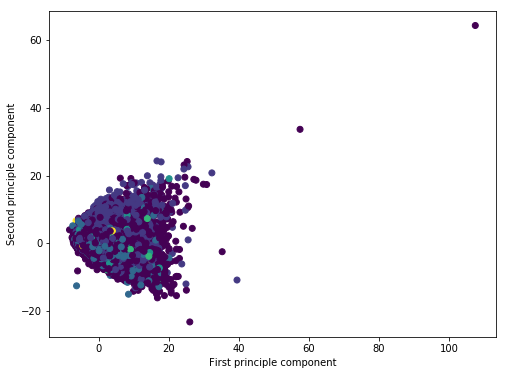

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1], c=Y )
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

#### Can you do it without using anything related to payment amount or outstanding principal?

In [24]:
#deleting extra columns to test for drill
y2015.drop(['out_prncp','dti','installment','last_pymnt_amnt','last_pymnt_d'], 1, inplace=True)

In [25]:
rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)
Y = y2015['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

cross_val_score(rfc, X, Y, cv=10)

c:\users\genta\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\genta\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\genta\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\genta\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in versio

array([0.96010544, 0.95989171, 0.9603429 , 0.9600342 , 0.95972453,
       0.95989076, 0.95853618, 0.95841744, 0.95912794, 0.95850948])

Answer: Doing so definitely compromises the intergrity of the data but it doesn't drop below 90%. 

In [26]:
#everything but maybe 4-5 columns
y2015.drop(['emp_length', 'home_ownership',
       'annual_inc', 'purpose', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'initial_list_status',
       'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'application_type', 'dti_joint',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
       'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
       'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit'], 1, inplace=True)

In [27]:
rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)
Y = y2015['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

cross_val_score(rfc, X, Y, cv=10)

c:\users\genta\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\genta\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\genta\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\genta\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in versio

array([0.6583553 , 0.61475624, 0.66338961, 0.66258222, 0.65867965,
       0.65407267, 0.65615427, 0.64765252, 0.64388344, 0.35557878])